<a href="https://colab.research.google.com/github/nausheen53/SMAI/blob/master/INCM_ASSIGN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
!pip3 install brian2
!pip3 install --upgrade neurodynex3

In [4]:
%%capture
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

nr of spikes: 0


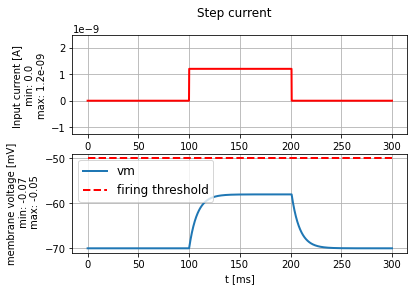

nr of spikes: 5


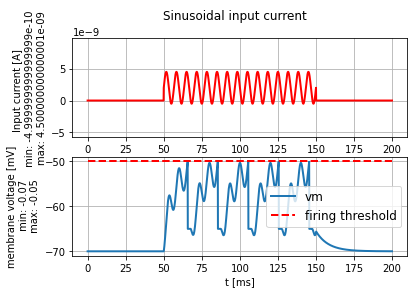

In [5]:
LIF.getting_started()

In [6]:
LIF.print_default_parameters()

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


nr of spikes: 0


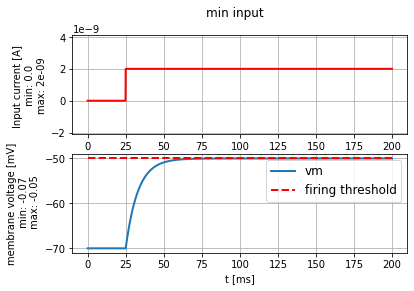

In [19]:
step_current = input_factory.get_step_current(
    t_start=25, t_end=200, unit_time=b2.ms,
    amplitude=2*b2.nA)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q.1 (b)**
**Plot the response of the neuron when you vary the membrane resistance,
Comment on the response of the neuron wrt the Passive Membrane
equation**

**comment** : Consider the equation  U(t) = U_rest + RIo[1-e^(t-to)/tow] 
we can also write it as U(t) - U_rest = RIo[1-e^(t-to)/tow] 
So, as we increase membrane resistance,U(t) - U_rest i.e. how far the membrane potential is from resting potential , also increase and same case for decrease in membrane resistance

So, When membrane resistance is increase , U(t) - U_rest change from (-70mV - -50mV) to (-70mV - -40mV)
and when membrane is decreased U(t) - U_rest change from (-70mV - -50mV) to (-70mV - -60mV)




Increase the membrane resistance to 1.5*10 7 ohm

nr of spikes: 0


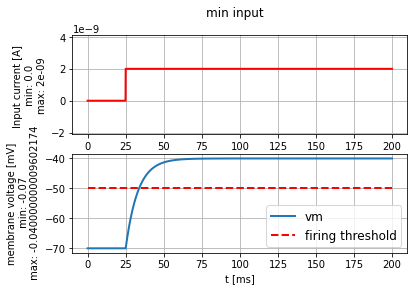

In [20]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=1.5*10000000*b2.ohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

 Decrease the membrane resistance to 0.5*10 7 ohm 

nr of spikes: 0


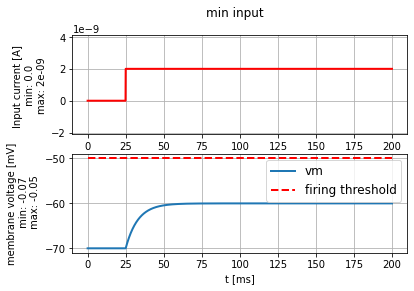

In [21]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=0.5*10000000*b2.ohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q1. C**
Plot the response of the neuron when you vary the membrane time-scale.
Comment on the response of the neuron w.r.t. the Passive Membrane
equation.

a. Increase the membrane time-scale to 16 ms

b. Decrease the membrane time-scale to 4 ms


**Comment** : 
Membrane time-scale govern how quickly the membrane potential approaches equilibrium.
when membrane time-scale increased to 16 ms, it takes more time to reach steady state whereas it takes very less time to reach steady state when membrane time-scale decreased to 4 ms

nr of spikes: 0


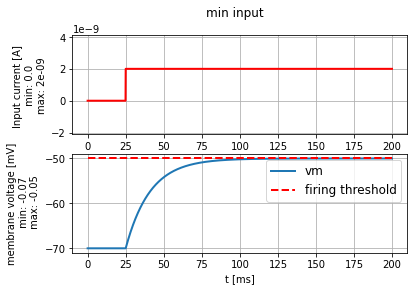

In [24]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=1*10000000*b2.ohm,membrane_time_scale=16*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

nr of spikes: 0


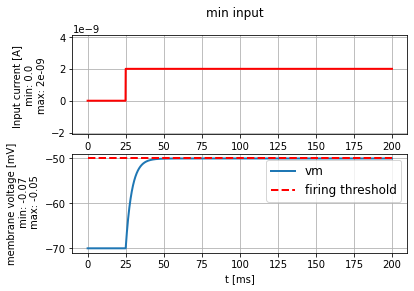

In [25]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=1*10000000*b2.ohm,membrane_time_scale=4*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q1.(d)**Plot the response of the neuron when a step current of different
amplitudes [1nA, 2nA, 4 nA, 8 nA, 16 nA] is given. Comment on the
response of the neuron w.r.t. the Passive Membrane equation.

**Comment** : According to passive membrane equation 
for step current, look at the point when it reached steady state i.e no more voltage fluctuation , equillibrium voltage Ui = U_rest + RIo.

from above equation we can say that, when the step current is more equillibrium voltage will be more
and from below present plot also we can say the same.

In [26]:
curr = [1,2,4,8,16]

nr of spikes: 0
nr of spikes: 0
nr of spikes: 0
nr of spikes: 0
nr of spikes: 0


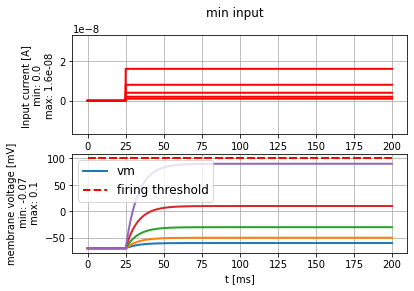

In [34]:
for c in curr:
  step_current = input_factory.get_step_current(
      t_start=25, t_end=200, unit_time=b2.ms,
      amplitude=c*b2.nA)  # set I_min to your value

  # run the LIF model.
  # Note: As we do not specify any model parameters, the simulation runs with the default values
  (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=8*b2.ms)

  # plot I and vm
  plot_tools.plot_voltage_and_current_traces(
  state_monitor, step_current, title="min input", firing_threshold=100*b2.mV)
  print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q5(e)**A step input current is given to a Passive Membrane neuron which is at a
higher potential than its resting membrane potential. What is the
difference in response of this neuron as compared to a neuron which is
given a similar step input current at its resting potential? Assume all the
other neuron parameters and variables are same for both the neurons.

**Comment** : According to the passive membrane equation , the response of membrane to step current is given by U(t) = U_rest + RIo[1-e^(t-to)/tow]

so from above equation, we can say that membrane voltage fluctuation start after membrane potential become equal to U_rest and then the term [1-e^(t-to)/tow] governs the voltage fluctuation

also as we can see in below plots when resting potential is default resting potential i.e. -0.07V , it start increasing/fluctuating

and in second plot membrane potential start increasing only after resting potential become equal to -50mV(resting potential in seond case)

and the jump in both the plots are same because other parameters are same in both neurons.




*   **let current of 2nA is given to neuron having a potential as resting membrane potential** .





nr of spikes: 0


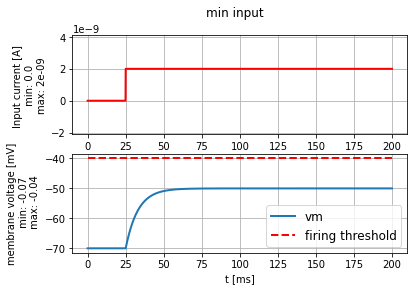

In [42]:
step_current = input_factory.get_step_current(
    t_start=25, t_end=200, unit_time=b2.ms,
    amplitude=2*b2.nA)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=-40*b2.mV)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0




*   **let current of 2nA is given to neuron and having a higher potential than its resting membrane potential . So. let v_rest = 10mV (default is -70mV) and keeping all parameter same**




nr of spikes: 0


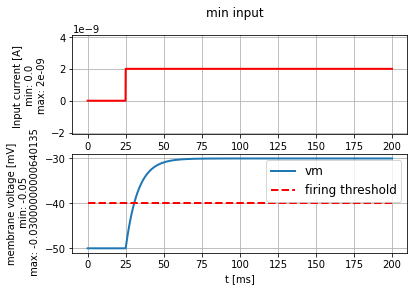

In [43]:
step_current = input_factory.get_step_current(
    t_start=25, t_end=200, unit_time=b2.ms,
    amplitude=2*b2.nA)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-50*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=-40*b2.mV)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q2(a)**

nr of spikes: 0


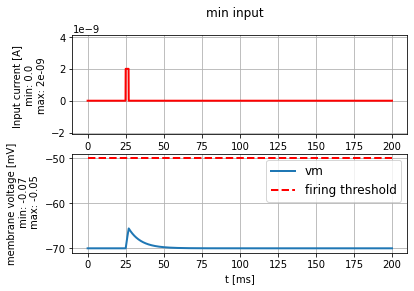

In [53]:
step_current = input_factory.get_step_current(
    t_start=25, t_end=26, unit_time=b2.ms,
    amplitude=2*b2.nA)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q2(b)Plot the response of the neuron when you vary the membrane resistance.
Comment on the response of the neuron w.r.t. the Passive Membrane
equation**

**comment** :passive membrane model's response to short impulse current : U(t) = U_rest + (q/c)(e^-(t-to)/tow)
 
U(t_o + delta) = u_rest + RIo[1-e^delta/tow],
we can write it as U(t_o + delta) - u_rest = RIo[1-e^delta/tow], so from this equation we can say that difference between membrane potential at time t_o+delta and t_o is proportional to R and as R increase difference in membrane potential at t_o+delta and resting membrane potential increases
similarly,we membrane resistance decreases,difference in membrane potential at t_o+delta and resting membrane potential decrease.

here delta is t_end - t_start

**Increase the membrane resistance to 1.5*10 7 ohm**

nr of spikes: 0


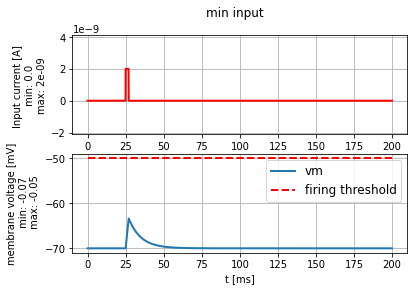

In [54]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=1.5*10000000*b2.ohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Decrease the membrane resistance to 0.5*10 7 ohm**

nr of spikes: 0


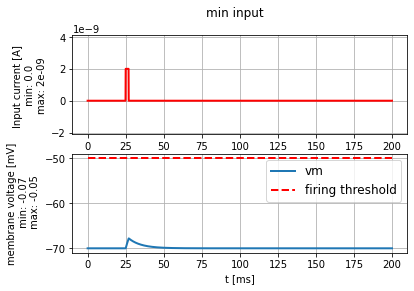

In [55]:
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=0.5*10000000*b2.ohm,membrane_time_scale=8*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q3(c)Plot the response of the neuron when you vary the membrane time-scale.
Comment on the response of the neuron w.r.t. the Passive Membrane
equation.**

**Comment** : equation for Passive membrane response to short pulse input is given as :  U(t) = U_rest + (q/c)(e^-(t-to)/tow) where tow is membrane time constant and it governs the rate at which membrane potential decays.

from the below present plots also,we can tell heigher is the the membrane time scale slower is the potential decay
and smaller is the membrane time ,faster is the decay.

**Increase the membrane time-scale to 16 ms**

nr of spikes: 0


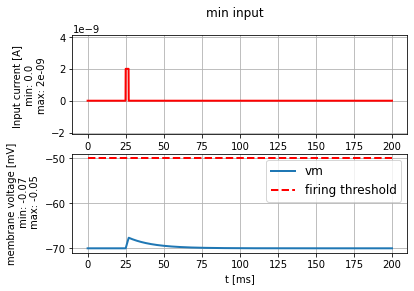

In [56]:
# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=16*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Decrease the membrane time-scale to 4 ms**

nr of spikes: 0


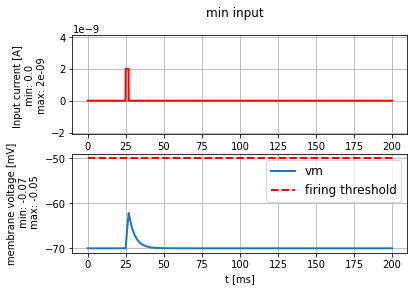

In [57]:
# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=4*b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

**Q2(d)Plot the response of the neuron when a step current of different
amplitudes [1nA, 2nA, 4 nA, 8 nA, 16 nA] is given. Comment on the
response of the neuron w.r.t. the Passive Membrane equation.**

**Comment** : passive membrane model's response to short impulse current : U(t) = U_rest + (q/c)(e^-(t-to)/tow)
where q = I*delta,charge deposited by pulse

from equation, U(t) is directly proportional to q/I, and more is the current input more will be membrane potential at time t_o+delta.

from plot below we can conclude the same


In [58]:
cur = [1,2,4,8,16]

nr of spikes: 0
nr of spikes: 0
nr of spikes: 0
nr of spikes: 0
nr of spikes: 0


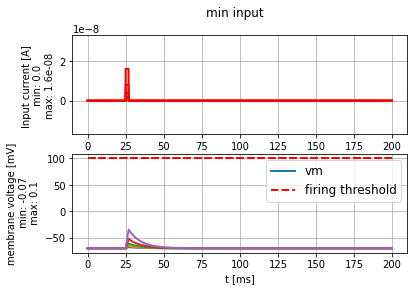

In [59]:
for c in cur:
  step_current = input_factory.get_step_current(
      t_start=25, t_end=26, unit_time=b2.ms,
      amplitude=c*b2.nA)  # set I_min to your value

  # run the LIF model.
  # Note: As we do not specify any model parameters, the simulation runs with the default values
  (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 200 * b2.ms,firing_threshold=1000*b2.mV,v_rest=-70*b2.mV,membrane_resistance=10*b2.Mohm,membrane_time_scale=8*b2.ms)

  # plot I and vm
  plot_tools.plot_voltage_and_current_traces(
  state_monitor, step_current, title="min input", firing_threshold=100*b2.mV)
  print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0